#**Question 1**
1.Load any one data set from the given four csv files or load it from
online repositories.

2.Perform necessary data preparation.

3.Train a Neural Network model of your choice (MLP with minimum 2
hidden layers or CNN or RNN).

4.Evaluate the model

5.Summarize the observations neatly

# CNN for the Dataset " breast cancer"

importing all neccessary packages

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Loading the dataset

In [ ]:
cancerData = datasets.load_breast_cancer()

Displaying the dataset

In [ ]:
X = pd.DataFrame(data = cancerData.data, columns=cancerData.feature_names )
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = cancerData.target

In [ ]:
X.shape

(569, 30)

Training and testing the data

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,stratify=y)

Extracting the Train data features

In [ ]:
X_train.shape

(512, 30)

Extracting the test data features

In [ ]:
y_test.shape

(57,)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Reshaping the dataset to 3-D to pass it through CNN

In [ ]:
X_train = X_train.reshape(512,30,1)
X_test = X_test.reshape(57,30,1)

Preparing the Model

In [ ]:
#defining the Filter size,kernel size,activation function and input
model = Sequential()
model.add(Conv1D(filters=16,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#converting the data ino 1D
model.add(Conv1D(32,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#flattening the data
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 29, 16)            48        
                                                                 
 batch_normalization (BatchN  (None, 29, 16)           64        
 ormalization)                                                   
                                                                 
 dropout_2 (Dropout)         (None, 29, 16)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 28, 32)            1056      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 28, 32)            0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=35,verbose=1,validation_data=(X_test,y_test))

Epoch 1/35
16/16 [==============================] - 2s 28ms/step - loss: 0.6414 - accuracy: 0.6348 - val_loss: 0.6313 - val_accuracy: 0.9298
Epoch 2/35
16/16 [==============================] - 0s 8ms/step - loss: 0.4340 - accuracy: 0.7930 - val_loss: 0.5795 - val_accuracy: 0.9649
Epoch 3/35
16/16 [==============================] - 0s 8ms/step - loss: 0.3743 - accuracy: 0.8398 - val_loss: 0.5309 - val_accuracy: 0.9649
Epoch 4/35
16/16 [==============================] - 0s 7ms/step - loss: 0.2861 - accuracy: 0.8633 - val_loss: 0.4862 - val_accuracy: 0.9649
Epoch 5/35
16/16 [==============================] - 0s 8ms/step - loss: 0.2654 - accuracy: 0.9004 - val_loss: 0.4436 - val_accuracy: 0.9649
Epoch 6/35
16/16 [==============================] - 0s 8ms/step - loss: 0.2194 - accuracy: 0.9297 - val_loss: 0.4006 - val_accuracy: 0.9649
Epoch 7/35
16/16 [==============================] - 0s 8ms/step - loss: 0.2192 - accuracy: 0.9160 - val_loss: 0.3599 - val_accuracy: 0.9649
Epoch 8/35
16/16 [=

as from the above model we can see that in every epoch the accuracy is 0.9 ,this defines that the particular dataset is suitable for CNN model.
There is less loss

In [ ]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

**INFERENCE**

From the below graph we can interpret that model accuracy is of train and validation is growing as per the epochs,where as the model loss is is decreasing as the epochs.

From thr below graph we can also say that the model is overfitting as the testing data and the training data are similar

The line of Validation and the train are colliding which indicates that the model is accurate for the CNN

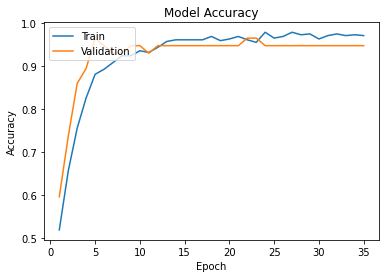

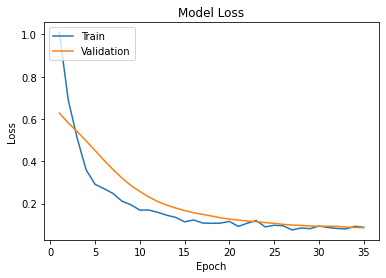

In [ ]:
plotLearningCurve(history,35)